In [22]:
#1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,B=goal).
#- Use Manhattan distance as heuristic.
#- Visualize the path found.

# --------- Maze ---------
maze = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]

Path found (steps): 24
Cost of path: 24
Whether the path is optimal: Optimal


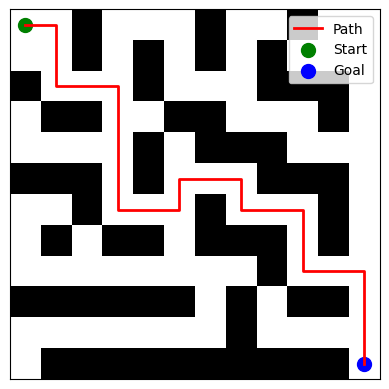

In [23]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ------------------------
# Maze setup
# ------------------------


# ------------------------
# Find start and goal
# ------------------------
start = goal = None
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 'A':
            start = (i, j)
            maze[i][j] = 0
        elif maze[i][j] == 'B':
            goal = (i, j)
            maze[i][j] = 0

# ------------------------
# Manhattan heuristic
# ------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# ------------------------
# A* search
# ------------------------
def a_star(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_list = []
    heapq.heappush(open_list, (manhattan(start, goal), 0, start, [start]))
    visited = set()

    while open_list:
        f, g, current, path = heapq.heappop(open_list)
        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path, g

        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                g_new = g + 1
                f_new = g_new + manhattan((nx, ny), goal)
                heapq.heappush(open_list, (f_new, g_new, (nx, ny), path + [(nx, ny)]))
    return None, None

# ------------------------
# Run A* search
# ------------------------
path, cost = a_star(maze, start, goal)

# ------------------------
# Print outputs
# ------------------------
if path:
    path_length = len(path) - 1
    optimality = "Optimal"  # Manhattan A* always finds shortest path in grid
    print("Path found (steps):", path_length)
    print("Cost of path:", cost)
    print("Whether the path is optimal:", optimality)
else:
    print("No path found.")

# ------------------------
# Visualization
# ------------------------
maze_array = np.array([[1 if cell == 1 else 0 for cell in row] for row in maze])
plt.imshow(maze_array, cmap='gray_r')

if path:
    px = [p[1] for p in path]
    py = [p[0] for p in path]
    plt.plot(px, py, color='red', linewidth=2, label='Path')

plt.scatter(start[1], start[0], c='green', s=100, label='Start')
plt.scatter(goal[1], goal[0], c='blue', s=100, label='Goal')

plt.gca().invert_yaxis() 
plt.gca().invert_xaxis()
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()# invert y-axis to match matrix layout
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()




In [16]:
maze = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1, 'B'],
]


 Normal heuristic 
Path found: 24 steps
Cost of path: 24
Optimality:  Optimal
Admissibility:  Admissible

 Scaled ×1.5 
Path found: 24 steps
Cost of path: 24
Optimality:  Optimal
Admissibility:  Not admissible (overestimates by 11.0)

 Inconsistent 
Path found: 26 steps
Cost of path: 26
Optimality:  Not optimal
Admissibility:  Not admissible (overestimates by 5)


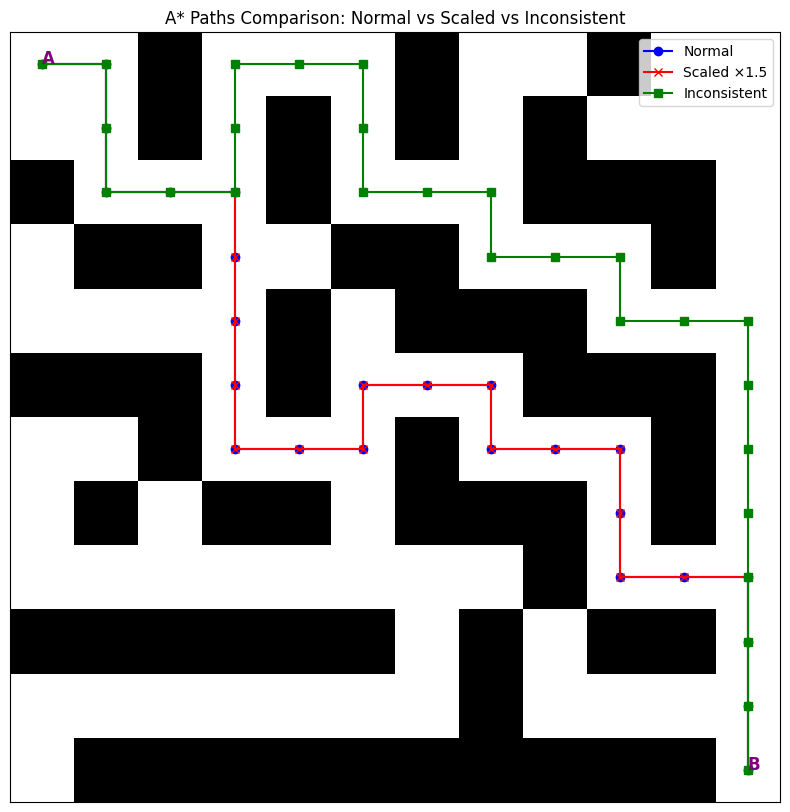

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ------------------------
# 1. Define the maze
# ------------------------

# ------------------------
# 2. Helper functions
# ------------------------
def neighbors(pos):
    x, y = pos
    for dx, dy in [(0,1),(1,0),(0,-1),(-1,0)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
            yield (nx, ny)

# Heuristics
def heuristic_normal(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def heuristic_scaled(a, b):
    return 1.5 * (abs(a[0]-b[0]) + abs(a[1]-b[1]))

def heuristic_inconsistent(a, b):
    h = abs(a[0]-b[0]) + abs(a[1]-b[1])
    if a == (5,5):  # Artificial inconsistency
        h += 5
    return h

# ------------------------
# 3. A* function
# ------------------------
def a_star_custom(heuristic_func):
    start = next((i,j) for i,row in enumerate(maze) for j,val in enumerate(row) if val=='A')
    goal  = next((i,j) for i,row in enumerate(maze) for j,val in enumerate(row) if val=='B')
    
    open_set = [(0, start)]
    g_score = {start:0}
    came_from = {}
    
    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal]
        
        for n in neighbors(current):
            tentative_g = g_score[current] + 1
            if tentative_g < g_score.get(n, float('inf')):
                g_score[n] = tentative_g
                f = tentative_g + heuristic_func(n, goal)
                heapq.heappush(open_set, (f, n))
                came_from[n] = current

# ------------------------
# 4. Compute paths
# ------------------------
path_normal, cost_normal = a_star_custom(heuristic_normal)
path_scaled, cost_scaled = a_star_custom(heuristic_scaled)
path_inconsistent, cost_inconsistent = a_star_custom(heuristic_inconsistent)

# ------------------------
# 5. True admissibility check
# ------------------------
def check_admissibility_true(heuristic_func):
    goal = next((i,j) for i,row in enumerate(maze) for j,val in enumerate(row) if val=='B')
    max_overestimate = 0
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] != 1 and maze[i][j] != 'B':
                # True distance ignoring obstacles (Manhattan)
                true_dist = abs(i-goal[0]) + abs(j-goal[1])
                h_val = heuristic_func((i,j), goal)
                over = h_val - true_dist
                if over > max_overestimate:
                    max_overestimate = over
    if max_overestimate > 0:
        return f" Not admissible (overestimates by {max_overestimate})"
    else:
        return " Admissible"

# ------------------------
# 6. Path analysis
# ------------------------
def analyze_path(path, cost, cost_optimal):
    path_len = len(path) - 1
    is_optimal = " Optimal" if cost == cost_optimal else " Not optimal"
    return {
        "Path length": path_len,
        "Cost": cost,
        "Optimality": is_optimal
    }

cost_optimal = cost_normal

results = {
    "Normal heuristic": analyze_path(path_normal, cost_normal, cost_optimal),
    "Scaled ×1.5": analyze_path(path_scaled, cost_scaled, cost_optimal),
    "Inconsistent": analyze_path(path_inconsistent, cost_inconsistent, cost_optimal)
}

# Print results with admissibility
for key, val in results.items():
    if key == "Normal heuristic":
        admissibility = check_admissibility_true(heuristic_normal)
    elif key == "Scaled ×1.5":
        admissibility = check_admissibility_true(heuristic_scaled)
    else:
        admissibility = check_admissibility_true(heuristic_inconsistent)
    
    print(f"\n {key} ")
    print("Path found:", val["Path length"], "steps")
    print("Cost of path:", val["Cost"])
    print("Optimality:", val["Optimality"])
    print("Admissibility:", admissibility)

# ------------------------
# 7. Plot paths
# ------------------------
maze_numeric = np.zeros((12,12))
for i in range(12):
    for j in range(12):
        if maze[i][j] == 1:
            maze_numeric[i][j] = 1

def path_coords(path):
    xs = [y for x, y in path]
    ys = [x for x, y in path]
    return xs, ys

plt.figure(figsize=(10,10))
plt.imshow(maze_numeric, cmap='Greys', origin='upper')

# Normal
x1, y1 = path_coords(path_normal)
plt.plot(x1, y1, color='blue', marker='o', label='Normal')

# Scaled
x2, y2 = path_coords(path_scaled)
plt.plot(x2, y2, color='red', marker='x', label='Scaled ×1.5')

# Inconsistent
x3, y3 = path_coords(path_inconsistent)
plt.plot(x3, y3, color='green', marker='s', label='Inconsistent')

# Start and goal
start = next((i,j) for i,row in enumerate(maze) for j,val in enumerate(row) if val=='A')
goal = next((i,j) for i,row in enumerate(maze) for j,val in enumerate(row) if val=='B')
plt.text(start[1], start[0], 'A', color='purple', fontsize=12, fontweight='bold')
plt.text(goal[1], goal[0], 'B', color='purple', fontsize=12, fontweight='bold')

plt.title("A* Paths Comparison: Normal vs Scaled vs Inconsistent")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.gca().invert_yaxis() 
plt.gca().invert_xaxis()
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()# invert y-axis to match matrix layout
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()



